<h1 align="center"><b>K-Means Clustering</b></h1>
<h2 align="center">Downsampling image colours</h2>

<h3>Import modules and image</h3>

In [1]:
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
%matplotlib inline

In [3]:
img = imread("./datasets/Canada.jpg")

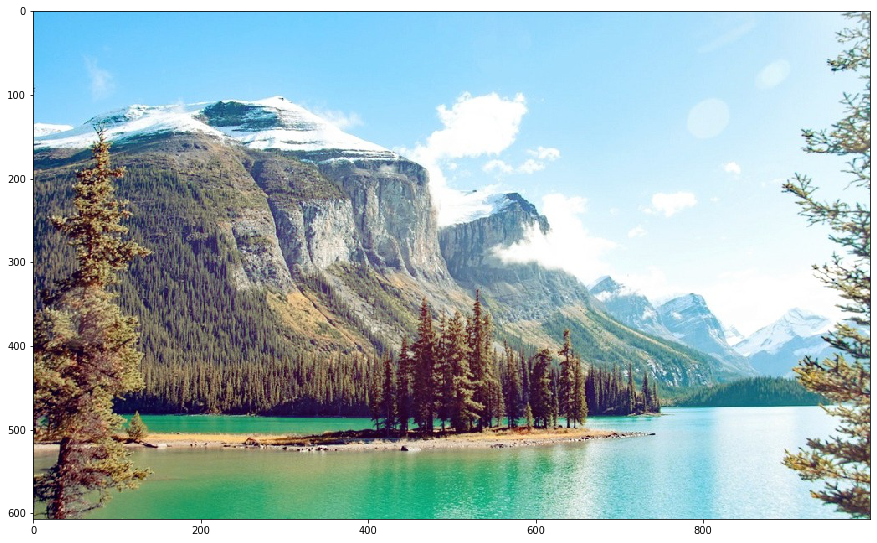

In [4]:
plt.figure(figsize=[15,15])
plt.imshow(img)
plt.show()

<h3>Preprocessing and Clustering</h3>

In [5]:
timg = np.reshape(img,[-1,3])

In [6]:
timg.shape

(607000, 3)

In [7]:
n = 10

In [8]:
km = KMeans(n_clusters=n,max_iter=700,n_jobs=-1)

In [9]:
km.fit(timg)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=700,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[135.42213402, 209.71069903, 246.10256256],
       [155.7815827 , 151.06249145, 118.01086128],
       [233.72743369, 247.07927116, 251.09416781],
       [ 49.26240839,  26.06127601,  45.6730312 ],
       [119.83513312, 158.52050314, 158.4708627 ],
       [188.90876786, 190.7908236 , 173.79744724],
       [117.49716565, 114.0052897 , 104.27112583],
       [ 85.95049383,  73.52941537,  76.71637732],
       [ 56.45148313, 149.23835115, 119.3363156 ],
       [184.93077511, 227.2623997 , 246.41575737]])

<h3>Predict and reconstruct image</h3>

In [11]:
dimg = km.predict(timg)

In [12]:
def assign_centroid_colours(value):
    return km.cluster_centers_[value]

In [13]:
fimg = np.array(list(map(assign_centroid_colours,dimg)),dtype=np.uint8)

In [14]:
rimg = np.reshape(fimg,img.shape)

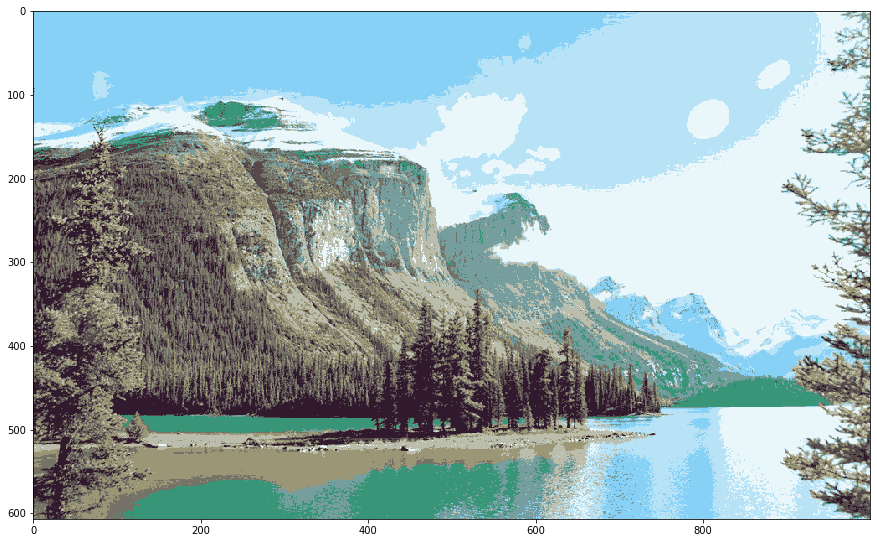

In [15]:
plt.figure(figsize=[15,15])
plt.imshow(rimg)
plt.show()

<h3>K-Means clustering of image colours for different values of K</h3>

In [16]:
N = [2,5,16,32]

In [17]:
k_obj = []

for i in N:
    k_obj.append(KMeans(n_clusters=i,max_iter=700,n_jobs=-1))

In [18]:
for i in range(len(N)):
    print("Training for N = {} started...".format(N[i]))
    k_obj[i].fit(timg)
    print("Training for N = {} completed.".format(N[i]))

Training for N = 2 started...
Training for N = 2 completed.
Training for N = 5 started...
Training for N = 5 completed.
Training for N = 16 started...
Training for N = 16 completed.
Training for N = 32 started...
Training for N = 32 completed.


In [19]:
def a_c_c(value,kmc):
    return kmc.cluster_centers_[value]

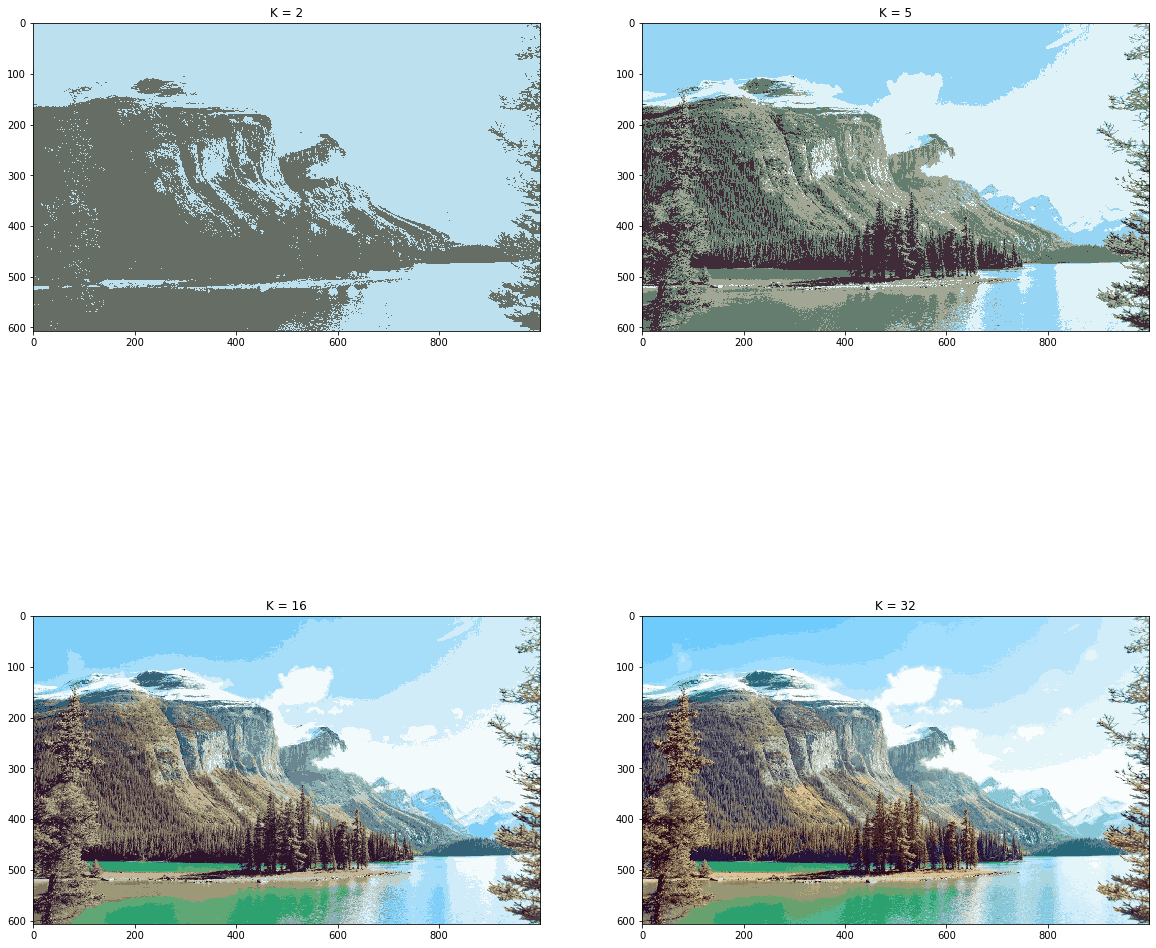

In [20]:
plt.figure(figsize=[20,20])

for i in range(len(N)):
    dimg = k_obj[i].predict(timg)
    fimg = np.array(list(map(a_c_c,dimg,[k_obj[i]]*len(dimg))),dtype=np.uint8)
    rimg = np.reshape(fimg,img.shape)
    plt.subplot(2,2,i+1,title="K = {}".format(N[i]))
    plt.imshow(rimg)

plt.show()